# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
max_temp=[]
humidity = []
cloudiness =[]
wind_speed = []
country = []
date = []
city_update = []
lat_update = []
lng_update = []
i=0

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_update.append(city)
        lat_update.append(response['coord']['lat'])
        lng_update.append(response['coord']['lon'])
        print(f"Processing Record {i} | {city}")
        i=i+1
    
    except:
        print("City not found. Skipping...")
        pass
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 | puerto ayora
Processing Record 1 | butaritari
Processing Record 2 | arraial do cabo
Processing Record 3 | mar del plata
Processing Record 4 | bluff
Processing Record 5 | esperance
Processing Record 6 | san patricio
Processing Record 7 | bredasdorp
Processing Record 8 | svetlogorsk
Processing Record 9 | rawson
Processing Record 10 | tiznit
Processing Record 11 | hualmay
Processing Record 12 | port lincoln
Processing Record 13 | sao filipe
Processing Record 14 | bambous virieux
Processing Record 15 | hermanus
Processing Record 16 | yellowknife
Processing Record 17 | chuy
Processing Record 18 | cape town
Processing Record 19 | hirara
Processing Record 20 | ponta do sol
Processing Record 21 | tuktoyaktuk
Processing Record 22 | punta arenas
Processing Record 23 | ilulissat
Processing Record 24 | santa isabel do rio negro
Processing Record 25 | nioro
Processing Record 26 | san lorenzo
Processing Record 27 | cabedelo

Processing Record 227 | churapcha
Processing Record 228 | mount isa
City not found. Skipping...
Processing Record 229 | roman
Processing Record 230 | karratha
Processing Record 231 | ati
Processing Record 232 | lorengau
Processing Record 233 | sawakin
Processing Record 234 | kruisfontein
City not found. Skipping...
Processing Record 235 | omsukchan
City not found. Skipping...
Processing Record 236 | vondrozo
Processing Record 237 | hami
Processing Record 238 | kpandae
Processing Record 239 | rio verde de mato grosso
Processing Record 240 | chapais
Processing Record 241 | nova friburgo
City not found. Skipping...
Processing Record 242 | mantua
Processing Record 243 | popondetta
Processing Record 244 | san quintin
Processing Record 245 | los llanos de aridane
Processing Record 246 | ulaangom
Processing Record 247 | faanui
Processing Record 248 | benjamin constant
Processing Record 249 | ahipara
Processing Record 250 | saint-philippe
Processing Record 251 | hasaki
Processing Record 252 | 

Processing Record 459 | lumeje
Processing Record 460 | comodoro rivadavia
Processing Record 461 | jinka
Processing Record 462 | salamiyah
Processing Record 463 | port macquarie
Processing Record 464 | boksitogorsk
Processing Record 465 | pimentel
Processing Record 466 | kajaani
Processing Record 467 | xichang
Processing Record 468 | te anau
Processing Record 469 | keuruu
Processing Record 470 | lianzhou
Processing Record 471 | chepareria
Processing Record 472 | sao jose da coroa grande
City not found. Skipping...
Processing Record 473 | la reforma
Processing Record 474 | hammerfest
Processing Record 475 | yurga
Processing Record 476 | saint-francois
Processing Record 477 | bjornevatn
Processing Record 478 | ittiri
Processing Record 479 | kralendijk
Processing Record 480 | juchitlan
Processing Record 481 | buraydah
Processing Record 482 | kendal
City not found. Skipping...
Processing Record 483 | shache
Processing Record 484 | evensk
Processing Record 485 | manakara
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City":city_update,
                         "Lat":lat_update,
                         "Lng":lng_update, 
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness":cloudiness, 
                         "Wind Speed":wind_speed,
                         "Country": country,
                         "Date":date})
city_data.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,80.60,61,20,16.11,EC,1592856963
1,butaritari,3.07,172.79,82.81,76,27,12.93,KI,1592856964
2,arraial do cabo,-22.97,-42.03,86.00,78,0,6.93,BR,1592856964
3,mar del plata,-38.00,-57.56,53.01,87,100,6.93,AR,1592856866
4,bluff,-46.60,168.33,39.00,83,1,3.00,NZ,1592856964


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.180881,19.426615,68.671347,70.089810,43.459413,7.789655,1.592857e+09
std,33.733584,89.279025,14.966124,20.646025,39.013612,5.247300,5.487601e+01
min,-54.800000,-175.200000,31.320000,7.000000,0.000000,0.430000,1.592857e+09
25%,-6.930000,-59.085000,57.200000,58.000000,1.000000,3.680000,1.592857e+09
50%,27.900000,23.680000,70.000000,74.000000,40.000000,6.930000,1.592857e+09
75%,50.040000,100.345000,80.010000,87.000000,82.000000,10.290000,1.592857e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,31.380000,1.592857e+09


In [7]:
# Export the City_Data into a csv
city_data.to_csv("output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

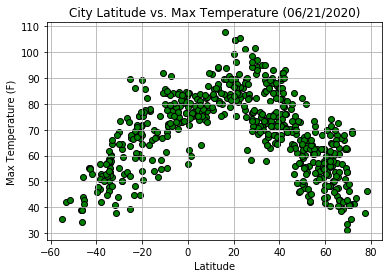

In [8]:
plt.scatter(city_data["Lat"],city_data["Max Temp"],facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (06/21/2020)')
plt.grid()
plt.savefig("output_data/Latitude_Temperature.png")
plt.show()


1. Cities near the equator (with latitude around zero) have higher max temperature than cities distributed in the northern and southern hemisphere.

## Latitude vs. Humidity Plot

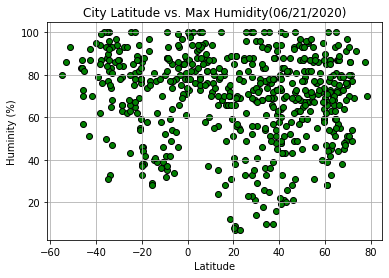

In [9]:
plt.scatter(city_data["Lat"],city_data["Humidity"],facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Huminity (%)')
plt.title('City Latitude vs. Max Humidity(06/21/2020)')
plt.grid()
plt.savefig("output_data/Latitude_Humidity.png")
plt.show()

1. The max humidity of a city does not have dirrect connection with its latitude.

## Latitude vs. Cloudiness Plot

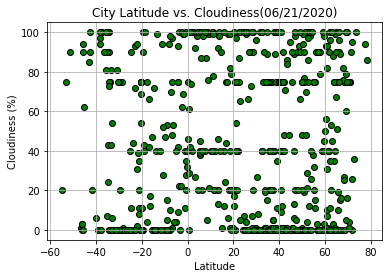

In [10]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"],facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness(06/21/2020)')
plt.grid()
plt.savefig("output_data/Latitude_Cloudiness.png")
plt.show()

1. The cloudiness of a city does not have direct connection with its latitude.

## Latitude vs. Wind Speed Plot

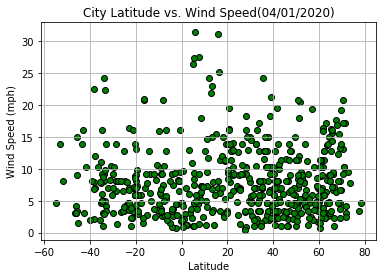

In [11]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"],facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed(04/01/2020)')
plt.grid()
plt.savefig("output_data/Latitude_Wind Speed.png")
plt.show()

1. The wind speed of a city does not have direct connection with its latitude.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_regression(x_values, y_values,x_label,y_label,position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
      

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = city_data.loc[city_data['Lat'].astype('float')>=0]
souther_city_data = city_data.loc[city_data['Lat'].astype('float')<0]
northern_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,butaritari,3.07,172.79,82.81,76,27,12.93,KI,1592856964
6,san patricio,19.22,-104.70,89.60,59,20,13.87,MX,1592856964
8,svetlogorsk,52.63,29.73,64.53,96,100,5.21,BY,1592856964
10,tiznit,29.58,-9.50,71.02,68,1,4.90,MA,1592856964
13,sao filipe,14.90,-24.50,79.79,68,1,15.43,CV,1592856965


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5027788237461859


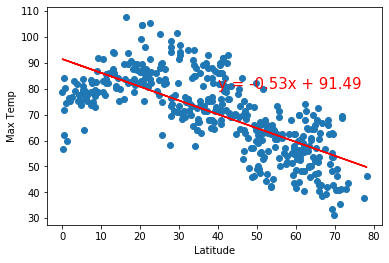

In [14]:
linear_regression(northern_city_data['Lat'], northern_city_data['Max Temp'] ,"Latitude","Max Temp",(40,80))

1. In northern hemisphere, as the cities go from equator to the north pole, their max temperature goes down.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6089411023788727


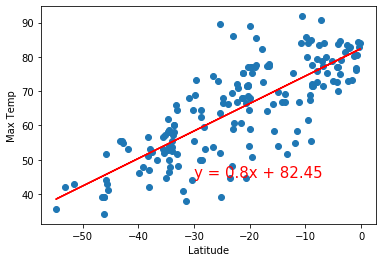

In [15]:
linear_regression(souther_city_data['Lat'], souther_city_data['Max Temp'] ,"Latitude","Max Temp",(-30,45))

1. In southern hemisphere, as the cities go from the south pole to the equator, their max temperature goes up. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0036384410440995474


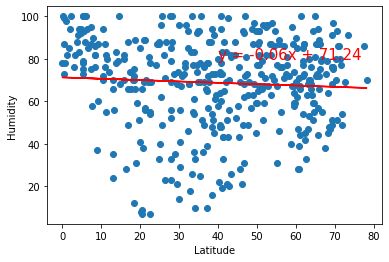

In [16]:
linear_regression(northern_city_data['Lat'], northern_city_data['Humidity'] ,"Latitude","Humidity",(40,80))

1. There is almost no correlation between humidity and latitude for cities in northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.046117285362463546


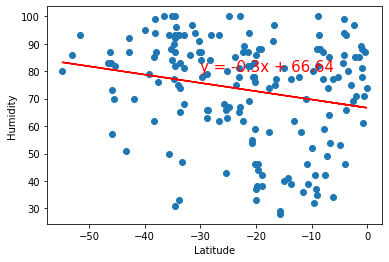

In [17]:
linear_regression(souther_city_data['Lat'], souther_city_data['Humidity'] ,"Latitude","Humidity",(-30,80))

1. There is a weak correlation between humidity and latitude for cities in souther hemisphere: as cities go from south pole to the equator, their humidity decreased slightly.
2. This is a relative weak correlation from the limited number of cities. As we choose more cities to investigate, the correlation may not exist any more.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009231882045261423


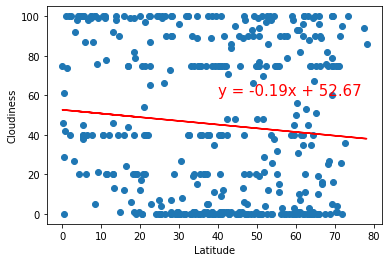

In [18]:
linear_regression(northern_city_data['Lat'], northern_city_data['Cloudiness'] ,"Latitude","Cloudiness",(40,60))

1. There is almost no correlation between cloudiness and latitude for cities in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00419726688220478


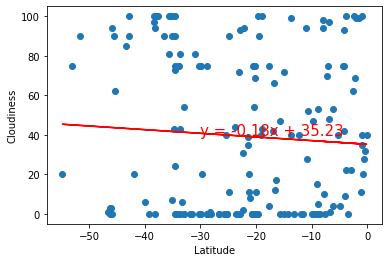

In [19]:
linear_regression(souther_city_data['Lat'], souther_city_data['Cloudiness'] ,"Latitude","Cloudiness",(-30,40))

1. There is almost no correlation between cloudiness and latitude for cities in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0022340657012817153


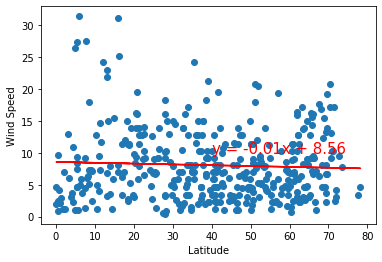

In [20]:
linear_regression(northern_city_data['Lat'], northern_city_data['Wind Speed'] ,"Latitude","Wind Speed",(40,10))

1. There is almost no correlation between wind speed and latitude for cities in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008124660376827325


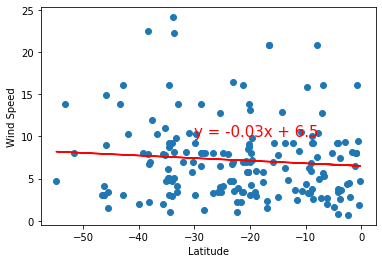

In [21]:
linear_regression(souther_city_data['Lat'], souther_city_data['Wind Speed'] ,"Latitude","Wind Speed",(-30,10))

1. There is almost no correlation between wind speed and latitude for cities in the southern hemisphere.